In [1]:
import cv2

from IPython.display import display, clear_output

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
smile = cv2.imread('smile.jpeg')
no_smile = cv2.imread('no_smile.jpeg')

Text(0.5, 1.0, 'No smile')

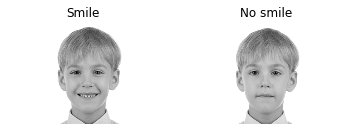

In [3]:

fig, ax = plt.subplots(1, 2)
clear_output()
ax[0].imshow(cv2.cvtColor(smile, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Smile')
ax[1].imshow(cv2.cvtColor(no_smile, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[1].axis('off')
ax[1].set_title('No smile')

In [4]:
# Code Cell 4
# path to the file containing the features that the openCv pipeline will look for in the frame
cascadePath = "C:/Users/roque/Documents/IoT/Python/haarcascade_frontalface_default.xml"
# initialize a model for detecting whether a certain portion of an image contains a face
faceCascade = cv2.CascadeClassifier(cascadePath)

In [5]:
# Code Cell 5
gray_smile = cv2.cvtColor(smile, cv2.COLOR_BGR2GRAY)

In [6]:
faces = faceCascade.detectMultiScale(
        gray_smile,
        scaleFactor=1.1,
        minNeighbors=6,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
# output of the classifier
faces

array([[343, 179, 444, 444]], dtype=int32)

(-0.5, 1079.5, 719.5, -0.5)

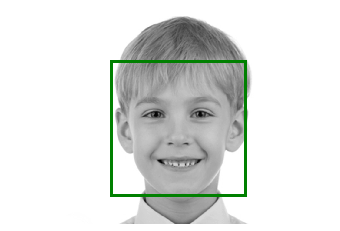

In [7]:
# Code Cell 7
# draw a rectangle
from matplotlib.patches import Rectangle

# visualize the detected face
fig, ax = plt.subplots()
ax.imshow(gray_smile, cmap='gray')

# iterate over all the detected faces
for face in faces:
    # retrieve the coordinates of the position of the current face, and its size    
    (x_smile, y_smile, w_smile, h_smile) = face
    # draw a rectangle where the face is detected    
    ax.add_artist(Rectangle((x_smile, y_smile), w_smile, h_smile, fill=False, lw=3, color='green'))

ax.axis('off')

In [8]:
# Code Cell 8
# convert the image to grayscale
gray_nosmile = cv2.cvtColor(no_smile, cv2.COLOR_BGR2GRAY)

# openCv algorithm to scan the image looking for haar features
faces  = faceCascade.detectMultiScale(
        gray_nosmile,
        scaleFactor=1.1,
        minNeighbors=6,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
# output of the classifier
faces

array([[306, 179, 450, 450]], dtype=int32)

(-0.5, 1079.5, 719.5, -0.5)

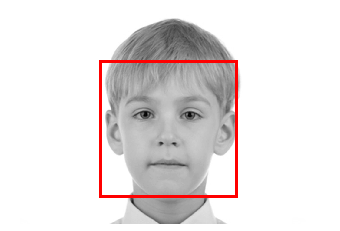

In [9]:

# Code Cell 9
# visualize the detected face
fig, ax = plt.subplots()
ax.imshow(gray_nosmile, cmap='gray')

# iterate over all the detected faces
for face in faces:
    # retrieve the coordinates of the position of the current face, and its size
    (x_smile, y_smile, w_smile, h_smile) = face
    (x_nosmile, y_nosmile, w_nosmile, h_nosmile) = face
    
    # draw a rectangle where the face is detected
    ax.add_artist(Rectangle((x_smile, y_smile), w_smile, h_smile, fill=False, lw=3, color='red'))

ax.axis('off')


In [10]:
# Code Cell 10
# select only the face portion from the smile test image
face_smile = gray_smile[y_smile:y_smile+h_smile, x_smile:x_smile+w_smile]

# The cropping coefficient for determining the size of the face
c1 = 0.2

# calculate how to crop the face
# vertical dimension
v_cut = int(c1 * w_smile)
# horizontal dimension
h_cut = int(c1 * h_smile)

# select only the face portion from the smile test image
cut_face_smile = gray_smile[y_smile+v_cut:y_smile+h_smile, 
                      x_smile+h_cut:x_smile-h_cut+w_smile]

In [11]:
## como afecta el ch 1?
####respuesta:

In [12]:
# Code Cell 11
# select only the face portion from the non-smile test image
face_nosmile = gray_nosmile[y_nosmile:y_nosmile+h_nosmile, x_nosmile:x_nosmile+w_nosmile]

# The cropping coefficient for determining the size of the face
c2 = 0.2

# calculate how to crop the face 
# vertical dimension
v_cut = int(c1 * w_nosmile)
# horizontal dimension
h_cut = int(c1 * w_nosmile)

# select only the face portion from the non smile test image
cut_face_nosmile = gray_nosmile[y_nosmile+v_cut:y_nosmile+h_nosmile, 
                      x_nosmile+h_cut:x_nosmile-h_cut+w_nosmile]

(-0.5, 269.5, 359.5, -0.5)

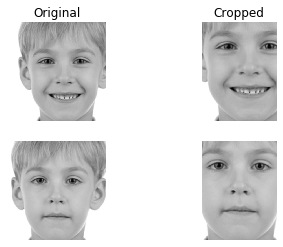

In [13]:
# Code Cell 12
fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(face_smile, cmap='gray')
ax[0][0].axis('off')
ax[0][0].set_title('Original')

ax[0][1].imshow(cut_face_smile, cmap='gray')
ax[0][1].axis('off')
ax[0][1].set_title('Cropped')

ax[1][0].imshow(face_nosmile, cmap='gray')
ax[1][0].axis('off')
ax[1][1].imshow(cut_face_nosmile, cmap='gray')
ax[1][1].axis('off')

In [14]:
# Code Cell 13
# import the numpy and scipy libraries to zoom the images
import numpy as np
from scipy.ndimage import zoom

# transform the stretched smiling face so that it has 64x64 pixels
standardized_face_smile = zoom(cut_face_smile, (64. / cut_face_smile.shape[0], 
                                           64. / cut_face_smile.shape[1])).astype(np.float32)

In [15]:
# Code Cell 14
# normalize the image so that its values are between 0 and 1
standardized_face_smile /= float(255)

In [16]:
# Code Cell 15
# transform the stretched non smiling face so that it has 64x64 pixels

standardized_face_nosmile = zoom(cut_face_nosmile, (64. / cut_face_nosmile.shape[0], 
                                           64. / cut_face_nosmile.shape[1])).astype(np.float32)

# normalize the image so that its values are between 0 and 1
standardized_face_nosmile /= float(255)

(-0.5, 63.5, 63.5, -0.5)

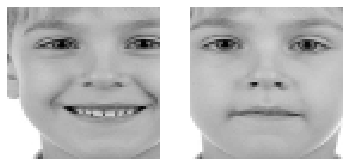

In [17]:
# Code Cell 16
plt.subplot(121)
plt.imshow(standardized_face_smile[:, :], cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(standardized_face_nosmile[:, :], cmap='gray')
plt.axis('off')

In [18]:
## Parte 3 de procesamiento de datos

In [19]:
# Code Cell 17
import pickle as pkl

# load LR model
with open('C:/Users/roque/Documents/IoT/Python/support_vector_machines.pkl', 'rb',) as f:
    classifier = pkl.load(f, encoding='bytes')

C:\Users\roque\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.svm.classes module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imported from sklearn.svm is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\roque\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator SVC from version pre-0.18 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [20]:
# Code Cell 18
pred =1
print (pred)

1


In [21]:
# Code Cell 19
answers = {0: 'NOT SMILING.', 1:'SMILING.'}

The person in this picture is SMILING.


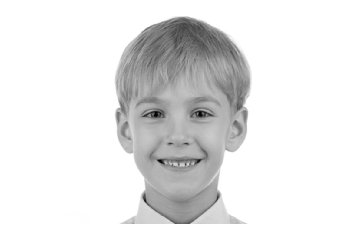

In [22]:
# Code Cell 20
plt.imshow(gray_smile[:, :], cmap='gray')
plt.axis('off')
print ('The person in this picture is', answers[pred])

The person in this picture is NOT SMILING.


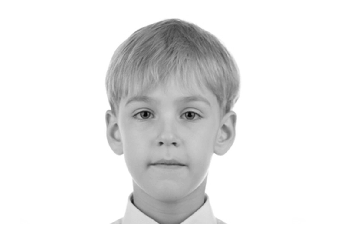

In [26]:
# Code Cell 21
# pred = classifier.predict(...)
# SOLUTION:
pred =0

plt.imshow(gray_nosmile[:, :], cmap='gray')
plt.axis('off')

# SOLUTION:
print ('The person in this picture is', answers[pred])

## Conclusiones
Este algoritmo funciona con imagenes de proporciones 1:1 y con una resolucion de 28px*28px pero para llegar a proporcionarle esta imagen al algoritmo se tiene que detectar el rostro en la imagen y para esto utilizamos una técnica de reconocimiento haarcascade esto a traves de archivos xml.
Una vez que se reconoció el rostro y se modificaron los parámetro para un reconocimiento bueno se tiene que recortar esa parte de la cara esto para proporcionarle una imagen que tendrá un margen de error mas pequeño ya que solo buscara en la imagen del rostro y no en toda la imagen la cual nos podría generar mas errores.
Una vez que se tiene esta imagen del rostro hace falta realizar un último paso para que nuestra imagen esté lista para nuestro algoritmo de detección de sonrisas y este es redimensionar la imagen a la dimension con la que el modelo de deteccion de sonrisas fue entrenado.
Un probema al que nos enfrentamos fue que el modelo que se nos proprcionó había sido entrenado con otra version de la libreria scikit-learn diferente, se entrenó con la version 0.18 y con la que mi equipo está trabajando es la version 0.23 por lo cual no se pudo solucionar, pero a pesar de esto se simularon unas respuestas para asi mostrar los resultados de las imagenes.